# 0 -  Importando o arquivo e bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


## 1 -  Lendo o arquivo e renomeando as colunas

In [2]:
 #lê o arquivo
turbina = pd.read_csv("T1.csv")

#renomeia as colunas
turbina.columns = ['Data_Hora','Potencia','Velocidade_vento', 'Curva_Teorica', 'Direcao_Vento']

#exclui coluna que não irei utilizar
del turbina['Direcao_Vento']

#transforma tipo de data
turbina['Data_Hora'] = pd.to_datetime(turbina['Data_Hora'])

display(turbina) #mostra na tela

,Data_Hora,Potencia,Velocidade_vento,Curva_Teorica
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


## 2 - Plota gráfico

<AxesSubplot:xlabel='Velocidade_vento', ylabel='Potencia'>

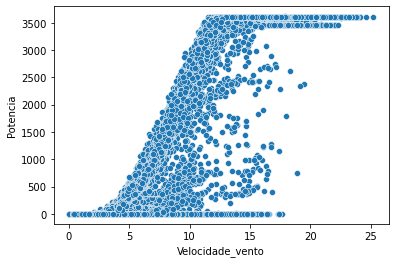

In [8]:
sns.scatterplot(data=turbina, x='Velocidade_vento', y='Potencia')

## 3 - Plotando os dados em um gráfico - Teórica

<AxesSubplot:xlabel='Velocidade_vento', ylabel='Curva_Teorica'>

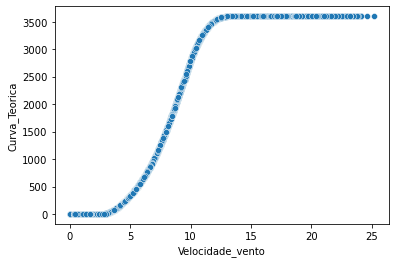

In [9]:
sns.scatterplot(data=turbina, x='Velocidade_vento', y='Curva_Teorica')

## 4 - "limite aceitável"

In [9]:
# transforma a potencia real em uma lista
pot_real = turbina['Potencia'].tolist()
pot_teorica = turbina['Curva_Teorica'].tolist()

pot_max = []
pot_min = []
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia * 1.05)
    pot_min.append(potencia * 0.95)

for p, potencia in enumerate(pot_real):
    if potencia >= pot_min[p] and potencia <= pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia == 0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')
        
print(dentro_limite.count('Dentro')/len(dentro_limite))


0.37286760340391845


# 5 - Adicionando lista "dentro_limite" no dataframe

In [10]:
turbina['Dentro_Limite'] = dentro_limite
display(turbina)

,Data_Hora,Potencia,Velocidade_vento,Curva_Teorica,Dentro_Limite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


# 6 - Plotando novamente o grafico

<AxesSubplot:xlabel='Velocidade_vento', ylabel='Potencia'>

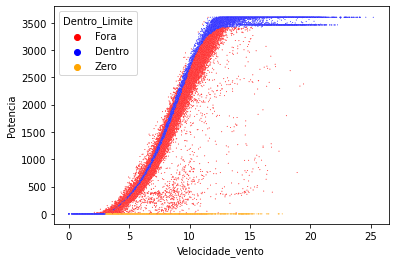

In [13]:
#cria meu próprio esquema de cores
cores = {'Dentro':'blue', 'Fora':'red', 'Zero':'orange'}
#plota o gráfico com as cores definidas (palette) e diminui o tamanho (s)
sns.scatterplot(data=turbina, x='Velocidade_vento', y='Potencia', hue='Dentro_Limite', s=1, palette=cores)